In [1]:
from DataBoosting import DataBoosting
from opendataval.dataloader import mix_labels_train
from opendataval.experiment import ExperimentMediator
import torch
from DIOOB_ import DIOOB


In [2]:
import time

num_ber = 2

base_classes = [DIOOB,]

class_suffixes = ['DIOOB_',]

# Create 50 classes for each category and store them in a dictionary
class_dict = {}
for suffix in class_suffixes:
    for i in range(1, num_ber):
        class_name = f"{suffix}{i}"
        base_class = base_classes[class_suffixes.index(suffix)]

        # Define the class dynamically using the `type` function
        class_definition = {
            "__init__": lambda self, *args, **kwargs: super(self.__class__, self).__init__(*args, **kwargs)
        }

        new_class = type(class_name, (base_class,), class_definition)
        class_dict[class_name] = new_class

# Define a list of classes and their parameters
classes = [
    ('DIOOB',{}),

]
# Initialize an empty list to store instances
data_evaluators = []

# Create instances for each class with the provided parameters
for class_name, params in classes:
    for i in range(1, num_ber):
        
        random_seed = int(time.time())
        time.sleep(1)
        class_instance = class_dict[f'{class_name}_{i}'](**params, random_state=random_seed)

        if class_name == "ds" or class_name == "bs":
            class_instance = class_dict[f'{class_name}_{i}'](**params, cache_name=f"{class_name}_{i}",
                                                             random_state=random_seed)

        data_evaluators.append(class_instance)

In [8]:
dataset_name = "digits"#jannis:openML ID 43977;CPU:openML ID 761
train_count, valid_count, test_count = 700, 70, 1000
noise_rate = 0.2
noise_kwargs = {'noise_rate': noise_rate}
train_kwargs = {}
model_name = "sklogreg"
metric_name = "accuracy"
output = 45641232209969190001111111

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir=f"D:/Users/paper_code/output_{output}",
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    add_noise=mix_labels_train,
    noise_kwargs=noise_kwargs,
    train_kwargs=train_kwargs,
    model_name=model_name,
    metric_name=metric_name,
    device=torch.device("cuda")
)

Base line model metric_name='accuracy': perf=0.7689999938011169


In [9]:
%%time
# compute data values.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

1
data_val 0


100%|██████████| 800/800 [00:23<00:00, 34.41it/s]

Elapsed time DIOOB_1(random_state=1738065808): 0:02:32.328590
end for
len
CPU times: total: 17min 48s
Wall time: 2min 32s


In [10]:
from opendataval.experiment.exper_methods import (
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    weight_accuracy,
    save_dataval
)
from matplotlib import pyplot as plt

# Saving the results
output_dir = f"D:/Users/paper_code/output_{output}/tmp/{dataset_name}_{noise_rate=}/"
exper_med.set_output_directory(output_dir)
output_dir

'D:/Users/paper_code/output_45641232209969190001111111/tmp/digits_noise_rate=0.2/'

In [11]:
exper_med.evaluate(save_dataval, save_output=True)
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
DIOOB_1(random_state=1738065808),0.897436


In [12]:
exper_med.evaluate(weight_accuracy, save_output=True)

,weight_accuracy
DIOOB_1(random_state=1738065808),0.936


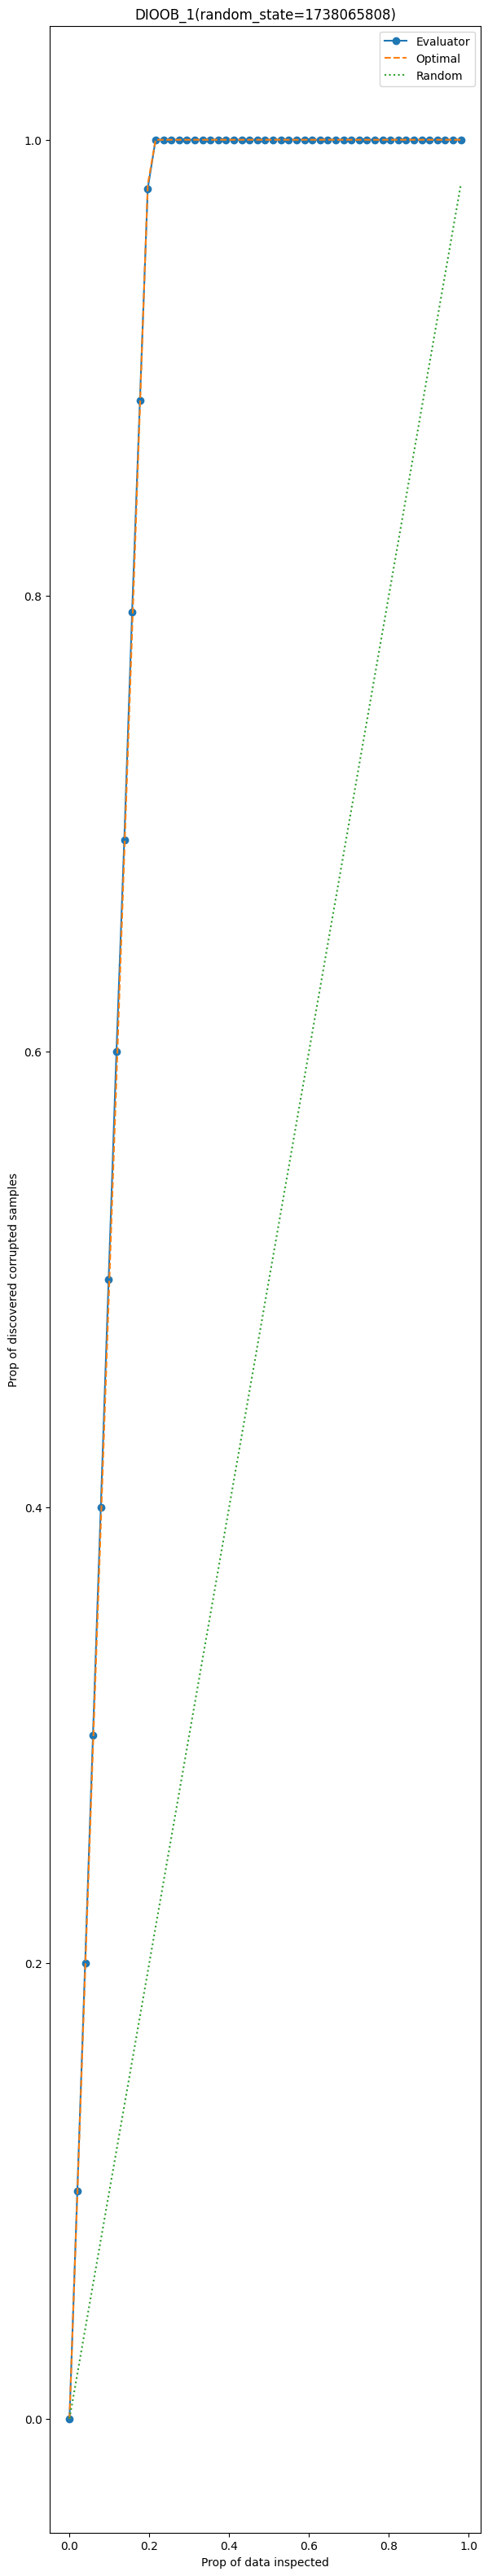

In [13]:
fig = plt.figure(figsize=(15, 40))
_, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, save_output=True)

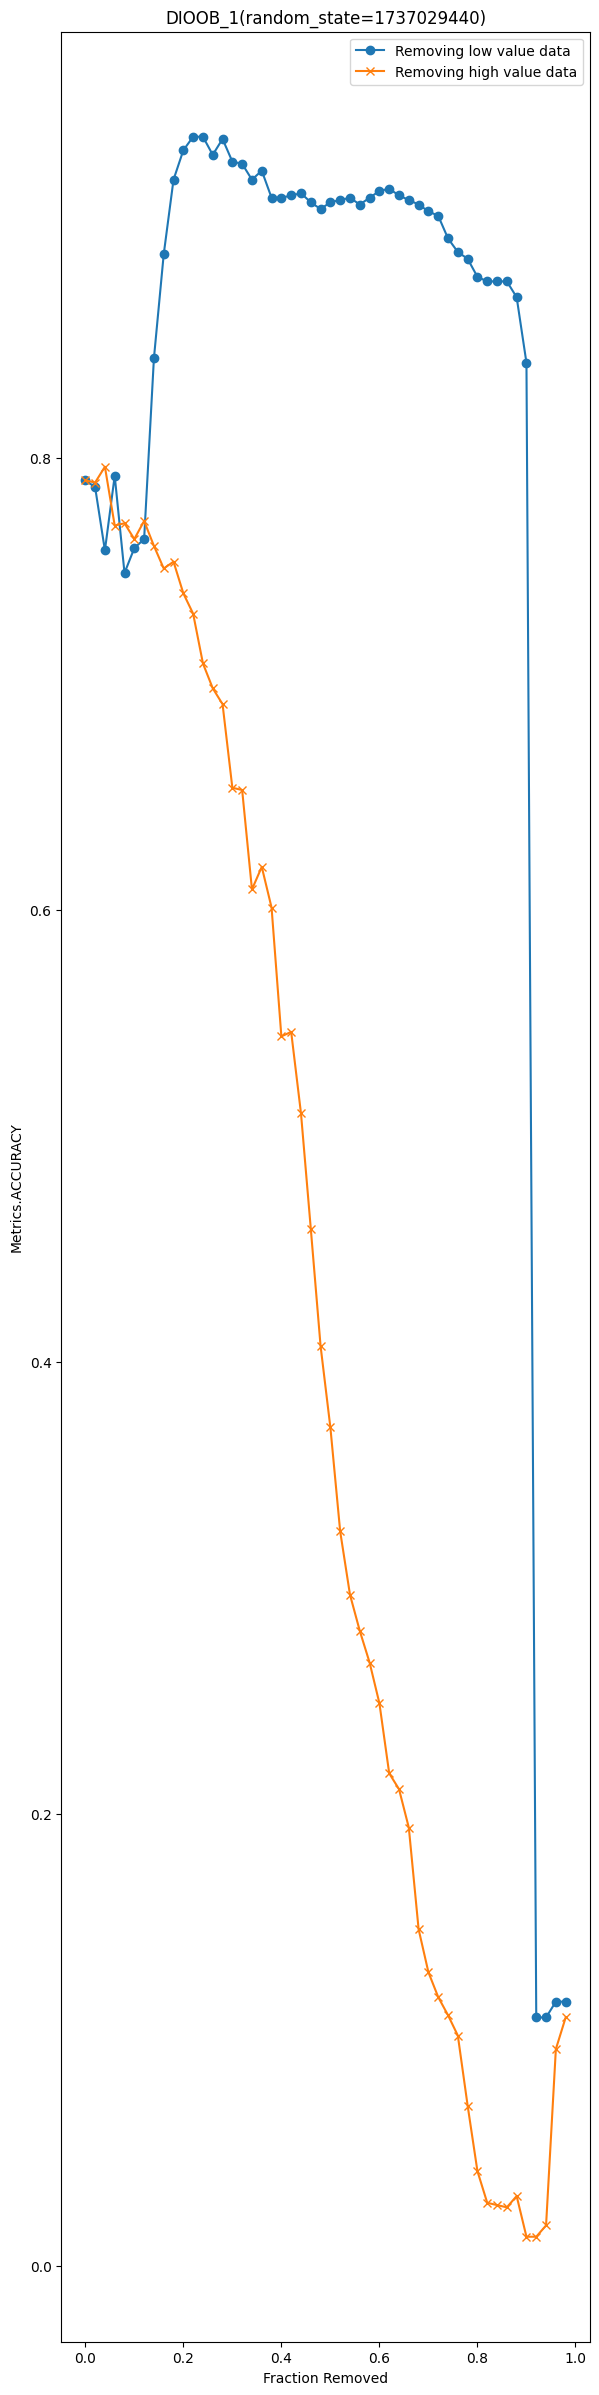

In [9]:
fig = plt.figure(figsize=(15, 30))
df_resp, fig = exper_med.plot(remove_high_low, fig, include_train=True, col=2, save_output=True)